/var/folders/dw/c8371k490nqcn8phbbtsq0sr0000gn/T/ipykernel_10632/4229821754.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pdf['rm'].fillna(pdf['rm'].mean(), inplace=True)


Iteration 0, Loss: 304.95911049999495
Iteration 1000, Loss: 22.808419550428436
Iteration 2000, Loss: 22.799537113299674
Iteration 3000, Loss: 22.799534744364504
Iteration 4000, Loss: 22.79953474373271
Iteration 5000, Loss: 22.799534743732544
Iteration 6000, Loss: 22.799534743732544
Iteration 7000, Loss: 22.799534743732544
Iteration 8000, Loss: 22.799534743732544
Iteration 9000, Loss: 22.799534743732544


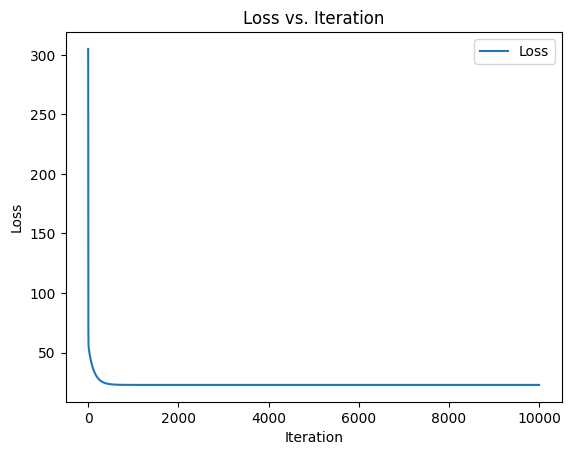

[29.35069854 36.17880555 14.02982014 24.76875974 18.80351082 23.24301223
 17.68440156 13.50005719 23.48999008 20.62748638 25.1097435  18.99434818
 -5.19914276 21.49492304 19.7245588  25.86972762 20.60735182  6.33384
 40.51462407 17.71385765 27.17842543 30.25526567 11.4462069  23.65719787
 18.32270297 16.70171422 22.70342798 15.0052778  22.64865012 19.25846263
 23.18681168 25.13918461 25.43409065 18.69037146 17.15031555 17.11535021
 30.85691582 20.32734637 23.66772203 24.16528532 14.01424186 32.75133969
 42.73662647 17.54139053 27.31727569 17.49332777 14.38253261 25.3423741
 20.5255751  30.14645181 21.75473735]


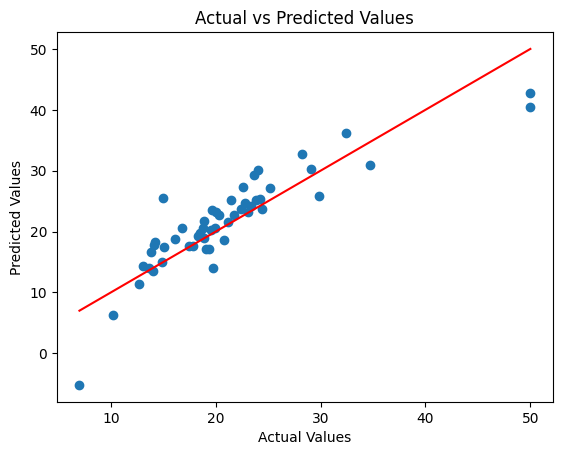

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class LinearRegression():
    def __init__(self, learning_rate=0.001, iterations=10000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.random.randn(self.n) * 0.01  # Small random weights
        self.b = 0.0
        self.X = X
        self.Y = Y

        # List to store loss values for each iteration
        loss_history = []

        for i in range(self.iterations):
            self.update_weights()
            current_loss = np.mean((self.Y - self.predict(self.X)) ** 2)
            loss_history.append(current_loss)

            # Print loss every 1000 iterations for monitoring
            if i % 1000 == 0:
                print(f"Iteration {i}, Loss: {current_loss}")

        # Plot the loss vs. iteration graph
        plt.plot(range(self.iterations), loss_history, label='Loss')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Loss vs. Iteration')
        plt.legend()
        plt.show()

        return self


    def update_weights(self):
        Y_pred = self.predict(self.X)
        dW = -(2 / self.m) * self.X.T.dot(self.Y - Y_pred)
        db = -(2 / self.m) * np.sum(self.Y - Y_pred)
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

    def predict(self, X):
        return X.dot(self.W) + self.b

def main():
    # Load dataset
    pdf = pd.read_csv("../../../Downloads/BostonHousing.csv")
    
    # Handle missing values in the 'rm' column by filling with the column mean
    pdf['rm'].fillna(pdf['rm'].mean(), inplace=True)
    
    # Define features (X) and target (Y)
    X = pdf.drop('medv', axis=1)  # Drop the target column from features
    Y = pdf['medv']  
    
    
    # Check for NaN or infinite values
    assert not np.any(np.isnan(X)), "X contains NaN"
    assert not np.any(np.isnan(Y)), "Y contains NaN"

    # Feature scaling
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split dataset
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

    # Train the model
    model = LinearRegression(learning_rate=0.16, iterations=10000)
    model.fit(X_train, Y_train)

    # Predictions
    Y_pred = model.predict(X_test)
    print(Y_pred)

    # Visualization
    plt.scatter(Y_test, Y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')
    plt.show()

if __name__ == "__main__":
    main()
